In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import pandas as pd

In [4]:
cifar10 = tf.keras.datasets.cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

170500096/170498071 [==============================] - 2s 0us/step


In [5]:
mnist = tf.keras.datasets.mnist
(x_train_mnist,y_train_mnist),(x_test_mnist,y_test_mnist) = mnist.load_data()
x_train_mnist,y_train_mnist = x_train_mnist/255.0 , x_test_mnist/255.0

11493376/11490434 [==============================] - 0s 0us/step


### Convolution Layer 구현해보기

In [8]:
model = Sequential([
  # input layer // 장표 49p 의 full conv layer 구현의 1단계 
  layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)), #우리가 사용하는 데이터가 2차원 데이터이므로 conv2d
  
  # hidden layer
  layers.MaxPooling2D((2,2)), # 인자의 크기만큼, 중에 큰값을 pulling
  layers.Conv2D(64,(3,3),activation = "relu"),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64,(3,3),activation = "relu"),
  # output layer
  layers.Flatten(),
  layers.Dense(64,activation='relu',),
  layers.Dense(10,activation='softmax')
])

In [6]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5057 - accuracy: 0.4527
Epoch 2/5
1563/1563 [==============================] - 4s 3ms/step - loss: 1.1442 - accuracy: 0.5962
Epoch 3/5
1563/1563 [==============================] - 4s 3ms/step - loss: 0.9892 - accuracy: 0.6527
Epoch 4/5
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8937 - accuracy: 0.6847
Epoch 5/5
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8248 - accuracy: 0.7101


CNN 을 사용해본 결과 정확도가 많이 올라갔음을 볼 수 있다.

이를 좀 더 향상시키기 위해 5번에서 50번으로 올려본다.

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5223 - accuracy: 0.4436
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1512 - accuracy: 0.5927
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0089 - accuracy: 0.6472
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9180 - accuracy: 0.6766
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8428 - accuracy: 0.7049
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7831 - accuracy: 0.7233
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7342 - accuracy: 0.7403
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6907 - accuracy: 0.7569
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.6517 - accuracy: 0.7698
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.619

In [10]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.5069 - accuracy: 0.6825


[2.5069327354431152, 0.6825000047683716]

train data에 대해선 학습률에 대해 많은 상승이 일어났지만

test data에 적용해보니, train data에 비해 현저히 떨어진다. 

dropout 을 적용해 test data 의 정확도를 올려보자.

( 학습속도가 늦어지지만, 학습률이 미미하게나마 올라갈 수 있다.)

()

In [30]:
model = Sequential([
  # input layer // 장표 49p 의 full conv layer 구현의 1단계 
  layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)), #우리가 사용하는 데이터가 2차원 데이터이므로 conv2d
  
  # hidden layer
  layers.MaxPooling2D((2,2)), # 인자의 크기만큼, 중에 큰값을 pulling
  layers.Conv2D(64,(3,3),activation = "relu"),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64,(3,3),activation = "relu"),
  # output layer
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(64,activation='relu',),
  layers.Dense(10,activation='softmax')
])

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=50)
model.evaluate(x_test,y_test)

Epoch 1/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5533 - accuracy: 0.4300
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2060 - accuracy: 0.5699
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0761 - accuracy: 0.6184
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9801 - accuracy: 0.6548
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9156 - accuracy: 0.6783
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8615 - accuracy: 0.6988
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8105 - accuracy: 0.7137
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7730 - accuracy: 0.7274
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7426 - accuracy: 0.7381
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.717

[1.0232759714126587, 0.7285000085830688]

dropout의 효과를 확인 할 수 있었다.

### 그래프로 확인해보기.

epochs 이 끝나면 validation_data를 체크한다.

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5628 - accuracy: 0.4266 - val_loss: 1.3061 - val_accuracy: 0.5222
Epoch 2/50
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2131 - accuracy: 0.5637 - val_loss: 1.0903 - val_accuracy: 0.6102
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.0688 - accuracy: 0.6213 - val_loss: 1.0470 - val_accuracy: 0.6331
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9812 - accuracy: 0.6552 - val_loss: 0.9295 - val_accuracy: 0.6723
Epoch 5/50
1563/1563 [==============================] - 5s 4ms/step - loss: 0.9107 - accuracy: 0.6792 - val_loss: 0.9002 - val_accuracy: 0.6826
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8580 - accuracy: 0.6983 - val_loss: 0.8853 - val_accuracy: 0.6924
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8099 - accuracy: 0.7143 - val_loss: 0.8937 - val_accuracy:

In [32]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0780 - accuracy: 0.7194


[1.0779989957809448, 0.7193999886512756]

In [33]:
history.history

{'accuracy': [0.42664000391960144,
  0.5637400150299072,
  0.6212599873542786,
  0.655239999294281,
  0.6791999936103821,
  0.6982799768447876,
  0.7143200039863586,
  0.7289800047874451,
  0.7391600012779236,
  0.7505800127983093,
  0.7586399912834167,
  0.7691400051116943,
  0.7769399881362915,
  0.7840999960899353,
  0.7912600040435791,
  0.7974799871444702,
  0.8042799830436707,
  0.8108800053596497,
  0.8121399879455566,
  0.8176400065422058,
  0.8233199715614319,
  0.8303999900817871,
  0.8322200179100037,
  0.8377599716186523,
  0.8427000045776367,
  0.8421000242233276,
  0.8445600271224976,
  0.8506199717521667,
  0.852940022945404,
  0.8561599850654602,
  0.8583199977874756,
  0.8610399961471558,
  0.8636800050735474,
  0.8662800192832947,
  0.8692399859428406,
  0.8719599843025208,
  0.8689200282096863,
  0.8726199865341187,
  0.8762000203132629,
  0.8755800127983093,
  0.8793399930000305,
  0.8817800283432007,
  0.881600022315979,
  0.8853200078010559,
  0.8853200078010559,


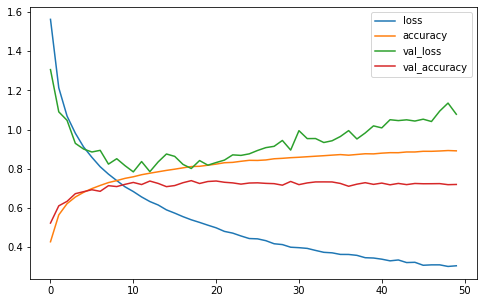

In [34]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()
# 그래프를 보고 epochs 값을 얼마나 지정할지 참고할 수 있다.


In [35]:
model.save('cifar10_model.h5') # 모델 통째로 저장

In [36]:
model_loaded = tf.keras.models.load_model('cifar10_model.h5') # 저장한 모델 불러오기

In [39]:
model_loaded.summary() # 저장된 모델 summary

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_7 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)             